# YouTube Ranking 시각화

In [77]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from folium.features import CustomIcon
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import folium

In [78]:
df = pd.read_csv('유튜브랭킹.csv')
df.head(3)

,순위,카테고리,채널명,구독자수,조회수,비디오수
0,1,음악/댄스/가수,BLACKPINK,"70,200,000","21,457,090,000",395
1,2,음악/댄스/가수,HYBE LABELS,"63,000,000","20,496,840,000",725
2,3,음악/댄스/가수,BANGTANTV,"61,500,000","14,077,940,000","1,646"


In [79]:
df['구독자수']=df['구독자수'].str.replace(',','').astype(int)
df['조회수']=df['조회수'].str.replace(',','').astype(np.int64)
df['비디오수']=df['비디오수'].str.replace(',','').astype(int)

In [80]:
df

,순위,카테고리,채널명,구독자수,조회수,비디오수
0,1,음악/댄스/가수,BLACKPINK,70200000,21457090000,395
1,2,음악/댄스/가수,HYBE LABELS,63000000,20496840000,725
2,3,음악/댄스/가수,BANGTANTV,61500000,14077940000,1646
3,4,음악/댄스/가수,SMTOWN,29300000,23016410000,3779
4,5,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],26500000,11052880000,223
...,...,...,...,...,...,...
995,996,음악/댄스/가수,Reynah,550000,148880000,246
996,997,TV/방송,J.Y. Park,550000,93730000,90
997,998,게임,[ALTUBE] 김성현TV,550000,422100000,2121
998,1000,게임,방앗간 비둘기,550000,356900000,4381


- 구독자수 top20

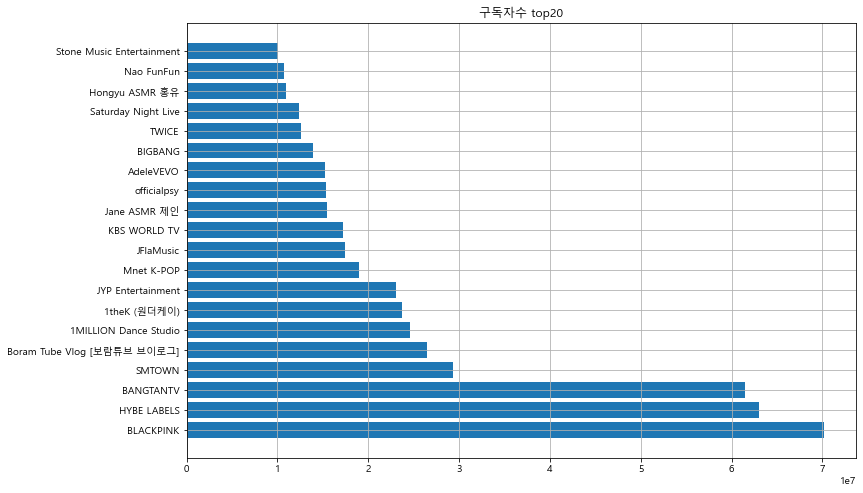

In [81]:
plt.figure(figsize=(12,8))
plt.barh(df.채널명.head(20),df.구독자수.head(20))
plt.title('구독자수 top20')
plt.grid()
plt.show()

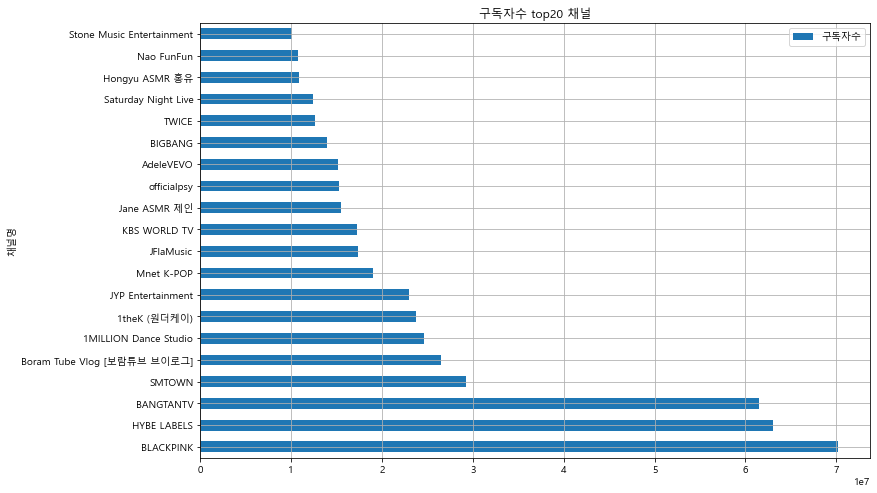

In [82]:
df2 = df[['채널명','구독자수']].head(20)
df2.set_index('채널명',inplace=True)
df2.plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구독자수 top20 채널')
plt.show()

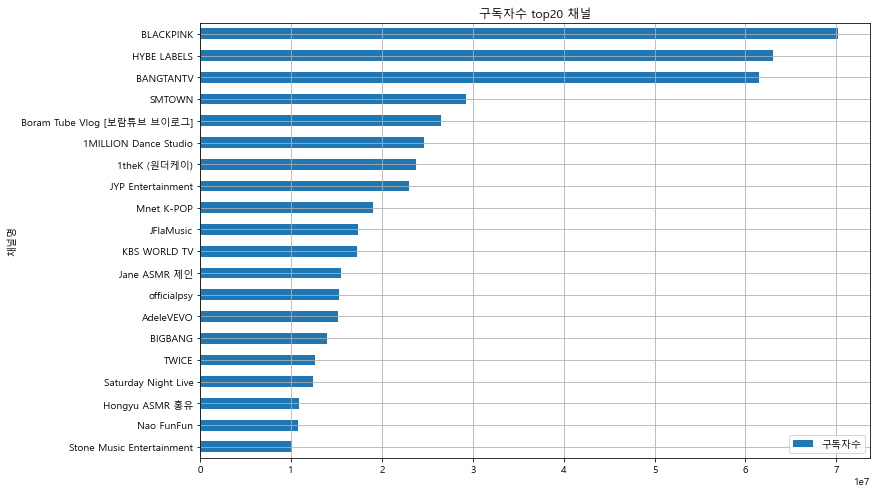

In [83]:
df2.sort_values(by='구독자수').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구독자수 top20 채널')
plt.show()

In [84]:
import seaborn as sns

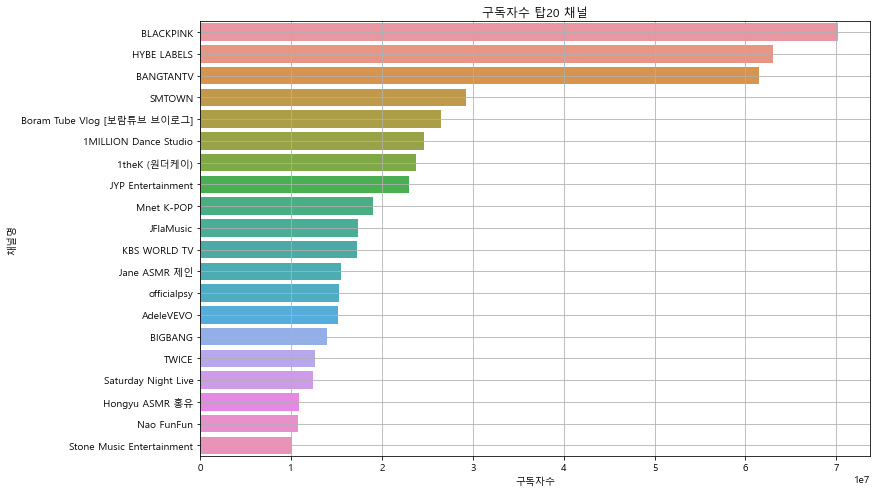

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(y='채널명',x='구독자수',data = df.head(20))
plt.title('구독자수 탑20 채널')
plt.grid()
plt.show()

- 조회수 기준 탑20

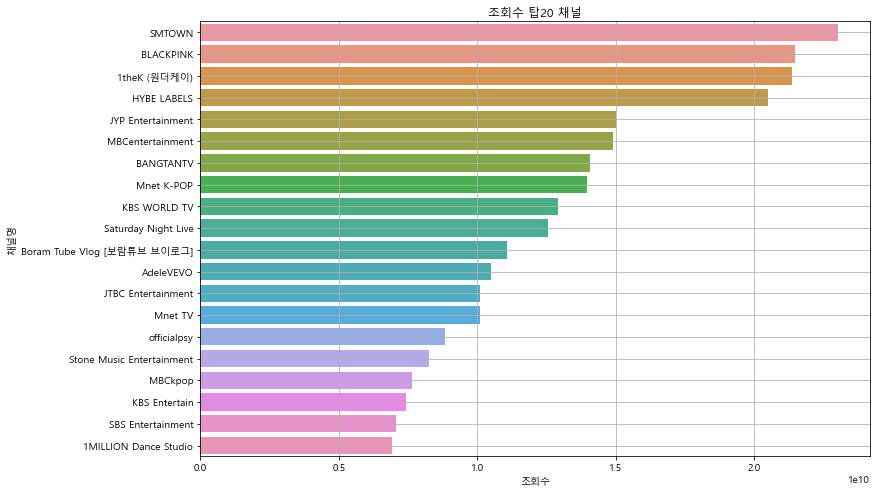

In [86]:

plt.figure(figsize=(12,8))
df2=df.sort_values(by='조회수',ascending=False).head(20)
sns.barplot(y='채널명',x='조회수',data = df2)
plt.title('조회수 탑20 채널')
plt.grid()
plt.show()

- 비디오수 기준 탑20

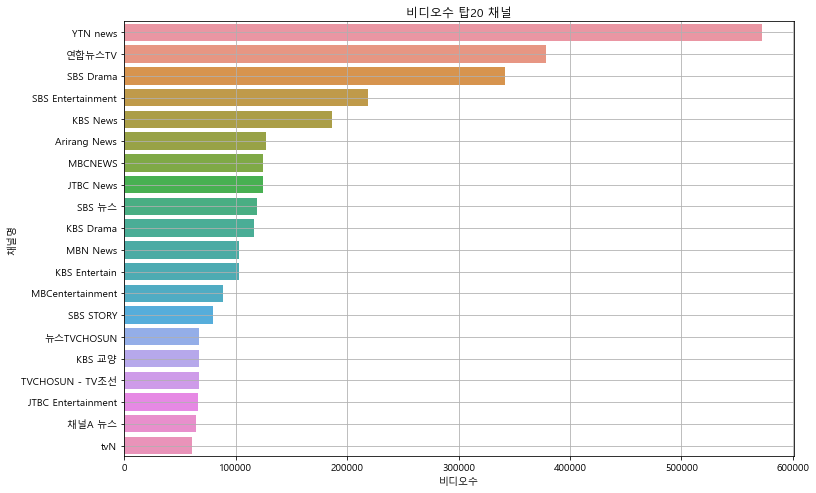

    순위      카테고리                          채널명      구독자수          조회수    비디오수
3    4  음악/댄스/가수                       SMTOWN  29300000  23016410000    3779
0    1  음악/댄스/가수                    BLACKPINK  70200000  21457090000     395
6    7  음악/댄스/가수                 1theK (원더케이)  23700000  21358840000   15675
1    2  음악/댄스/가수                  HYBE LABELS  63000000  20496840000     725
7    8  음악/댄스/가수            JYP Entertainment  23000000  15004820000    1429
28  29  뉴스/정치/사회             MBCentertainment   8490000  14898780000   88219
2    3  음악/댄스/가수                    BANGTANTV  61500000  14077940000    1646
8    9  음악/댄스/가수                   Mnet K-POP  19000000  13974230000   26841
10  11     TV/방송                 KBS WORLD TV  17200000  12905050000   54160
16  17       미분류          Saturday Night Live  12400000  12565100000    7780
4    5    키즈/어린이  Boram Tube Vlog [보람튜브 브이로그]  26500000  11052880000     223
13  14       미분류                    AdeleVEVO  15200000  10505050000      49

In [131]:
plt.figure(figsize=(12,8))
df3=df.sort_values(by='비디오수',ascending=False).head(20)
sns.barplot(y='채널명',x='비디오수',data = df3)
plt.title('비디오수 탑20 채널')
plt.grid()
plt.show()
print(df2)

- 카테고리별 채널수 

In [88]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,172
TV/방송,144
미분류,126
키즈/어린이,89
음식/요리/레시피,83
게임,70
BJ/인물/연예인,66
뉴스/정치/사회,53
패션/미용,42
취미/라이프,37


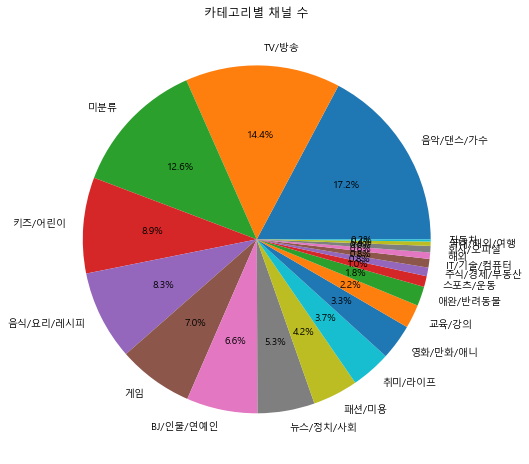

In [89]:
df3 = df.카테고리.value_counts().to_frame().head(20)
plt.figure(figsize=(12,8))
plt.pie('카테고리',labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널 수')
plt.show()

- 카테고리별 구독자수

In [113]:
df.groupby('카테고리').sum()

,순위,구독자수,조회수,비디오수
카테고리,,,,
BJ/인물/연예인,30697,93710000,35906670000,61217
IT/기술/컴퓨터,4742,8410000,2046070000,12858
TV/방송,72842,241660000,167310370000,1649441
게임,42033,70960000,50378950000,183934
교육/강의,11886,24740000,5647140000,21177
국내/해외/여행,2179,3790000,1430480000,4658
뉴스/정치/사회,28247,75100000,89700360000,2759333
미분류,91137,133330000,55178500000,99831
스포츠/운동,4146,14850000,3855360000,44697


In [114]:
df4=df.groupby('카테고리')['구독자수'].agg(['count','sum'])
df4


,count,sum
카테고리,,
BJ/인물/연예인,66,93710000
IT/기술/컴퓨터,8,8410000
TV/방송,144,241660000
게임,70,70960000
교육/강의,22,24740000
국내/해외/여행,4,3790000
뉴스/정치/사회,53,75100000
미분류,126,133330000
스포츠/운동,10,14850000


In [121]:
df4.columns=['채널수','구독자수']
df4=df4.sort_values(by='구독자수',ascending=False)
df4

,채널수,구독자수
카테고리,,
음악/댄스/가수,172,715400000
키즈/어린이,89,270640000
TV/방송,144,241660000
음식/요리/레시피,83,185020000
미분류,126,133330000
BJ/인물/연예인,66,93710000
뉴스/정치/사회,53,75100000
게임,70,70960000
취미/라이프,37,48930000


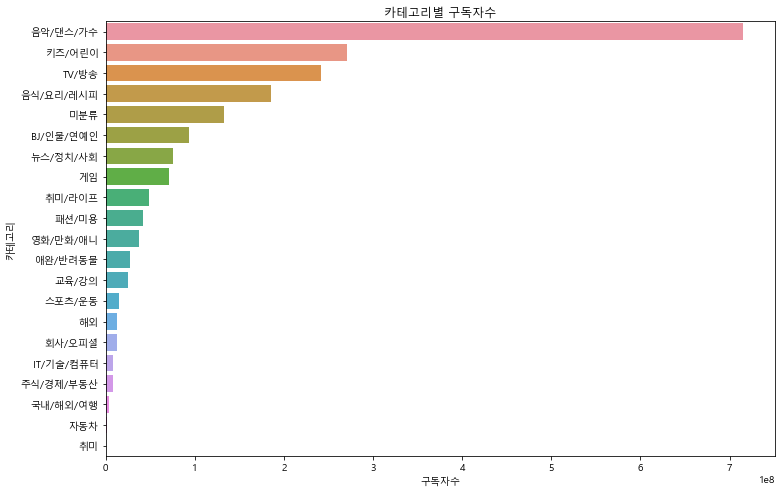

In [123]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수',y=df4.index, data=df4)
plt.title('카테고리별 구독자수')
plt.show()

In [129]:
df4=df4.head(10)
df4

,채널수,구독자수
카테고리,,
음악/댄스/가수,172,715400000
키즈/어린이,89,270640000
TV/방송,144,241660000
음식/요리/레시피,83,185020000
미분류,126,133330000
BJ/인물/연예인,66,93710000
뉴스/정치/사회,53,75100000
게임,70,70960000
취미/라이프,37,48930000


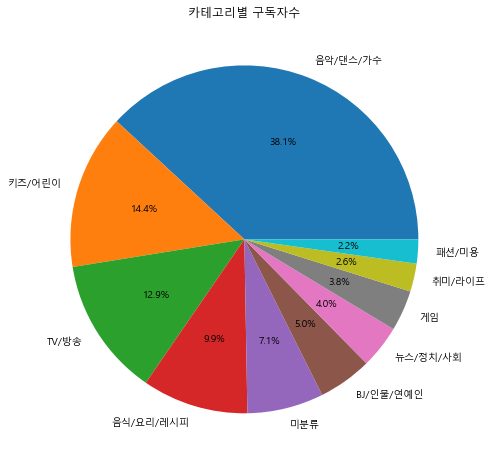

In [130]:

plt.figure(figsize=(12,8))
plt.pie('구독자수',labels=df4.index, data=df4, autopct='%.1f%%')
plt.title('카테고리별 구독자수')
plt.show()